<a href="https://colab.research.google.com/github/eudyzerpa/Asterisk/blob/main/18_Analisis_de_Componentes_Principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Componentes Principales (PCA)

En este notebook práctico veremos el cómo se implementa y utiliza el Análisis de Componentes Principales (PCA) como método de reducción de la dimensionalidad, y su aplicación en un ejercicio de clasificación ya conocido. Para ello, llevaremos a cabo la reducción de dimensiones del **UCI Wine Dataset** y aplicaremos un modelo de clasificación sobre este resultado.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, KernelPCA
import math

In [ ]:
# Descarga del dataset
dataset = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
dataset

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Como podemos recordar, esta dataset está compuesto por 178 registros con 14 columnas, siendo la primera de ellas el valor que deseamos predecir (problema de clasificación).

En este caso, vamos a reducir las 14 columas del dataset original, a sus primeras 3 Componentes Principales. Sin embargo, antes de realizar esto, vamos a hacer el procesamiento de los datos ya conocidos:

In [ ]:
# Mezclamos el dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Separamos las entradas y las etiquetas del modelo
X = dataset.iloc[:, 1:14]
y = dataset.iloc[:, 0]

# Generamos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022)

# Creamos un Standard Scaler y hacemos el fit a los datos de entrenamiento
estandardScaler = StandardScaler().fit(X_train)

# Realizamos la estandarizacion
X_train_scaled = estandardScaler.transform(X_train)
X_test_scaled = estandardScaler.transform(X_test)

Una vez que ya se tiene los datos separados en sus conjuntos de entrenamiento y prueba, y se rescalan los mismos, entonces vamos a hacer uso de la función *PCA()* de *Scikit-Learn* para encontrar las 3 primeras componentes principales:

In [ ]:
# Se defije el PCA con el numero de componentes
pca = PCA(n_components = 3)

In [ ]:
# Se ajustan los datos para calcular las componentes
ajustarPCA = pca.fit(X_train_scaled)

# Se transforman los datos
X_train_PCA = ajustarPCA.transform(X_train_scaled)
X_test_PCA = ajustarPCA.transform(X_test_scaled)

Al aplicar el algoritmo de PCA, vamos a obtener entonces un conjunto de datos tanto de entrenamiento como de prueba, en donde las variables han sido convertidas a 3 dimensiones.

In [ ]:
# Veamos los primeros 10 registros del conjunto de datos de entrenamiento redimensionado
X_train_PCA[0:10]

array([[ 2.58463528, -1.85113013, -0.03749323],
       [-2.35540652,  0.48217772, -1.11193377],
       [-0.38215665,  2.03568925, -1.61396668],
       [-1.83286208, -2.07882848,  0.20398139],
       [ 1.046909  , -0.34588926,  0.82818504],
       [-1.64208432,  1.98866571,  0.56832759],
       [ 2.00641126, -1.39271227, -0.03530416],
       [ 0.86184066,  1.38833296,  0.66015641],
       [ 1.01981868,  3.14203846, -0.61097268],
       [-3.55362444, -2.01212705, -0.35523012]])

Además, es posible obtener la proporción de varianza explicada por estas componentes principales:

In [ ]:
# Proporcion de varianza
proporcion_varianza = pca.explained_variance_ratio_
proporcion_varianza*100

array([35.95786336, 19.38950945, 10.74785148])

Este resultado se interpreta como que la 1era Componente Principal explica el 36% de la variancia del conjunto de datos original, mientras que la 2da Componente y 3era Componente explica el 19% y el 11% restante respectivamente. En efecto, se observa cómo, en el nuevo espacio tridimensional de datos, la primera componente representa aquella en donde los datos proyectados ofrecen mayor varianza.

Una vez que se obtienen estas componentes, entonces podemos aplicar el ejercicio de clasificación similar a lo que trabajamos en secciones pasadas. Por ejemplo, vamos a aplicar una clasificación con Bosque Aleatorios, a fin de ver su desempeño frente a este conjunto de datos cuyas dimensiones han sido reducidas:

In [ ]:
# Definimos un modelo de arbol de decision
clasificadorRF = RandomForestClassifier(n_estimators=2, max_depth=4, criterion='gini', random_state=2022)

# Realizamos el fit del clasificador sobre los datos de entrenamiento PCA
clasificadorRF.fit(X_train_PCA, y_train)

RandomForestClassifier(max_depth=4, n_estimators=2, random_state=2022)

Una vez ajustado el clasificador a los datos de entrenamiento, podemos realizar las predicciones y evaluar las métricas de desempeño:

In [ ]:
# Prediccion con el conjunto de entrenamiento
y_pred_train = clasificadorRF.predict(X_train_PCA)

In [ ]:
# Prediccion con el conjunto de prueba
y_pred_test = clasificadorRF.predict(X_test_PCA)

<ipython-input-11-252fdb3de278>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-11-252fdb3de278>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


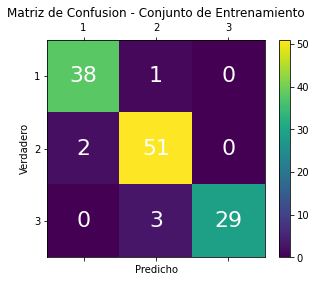

In [ ]:
# Matriz de confusion de entrenamiento
matriz_confusion_train = metrics.confusion_matrix(y_train, y_pred_train)

# Definimos los labels para la grafica de la matriz de confusion
labels = list(clasificadorRF.classes_)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
cax = ax.matshow(matriz_confusion_train)
plt.title('Matriz de Confusion - Conjunto de Entrenamiento')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
for (i, j), z in np.ndenumerate(matriz_confusion_train):
    ax.text(j, i, z, ha='center', va='center', color='white', size=22)
plt.show()

<ipython-input-12-5e09ae1e4f8e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-12-5e09ae1e4f8e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


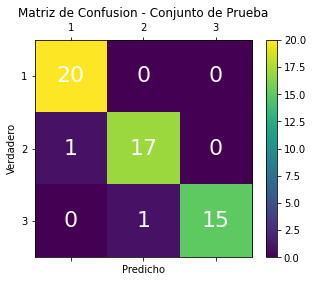

In [ ]:
# Matriz de confusion de Prueba
matriz_confusion_test = metrics.confusion_matrix(y_test, y_pred_test)

# Definimos los labels para la grafica de la matriz de confusion
labels = list(clasificadorRF.classes_)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
cax = ax.matshow(matriz_confusion_test)
plt.title('Matriz de Confusion - Conjunto de Prueba')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
for (i, j), z in np.ndenumerate(matriz_confusion_test):
    ax.text(j, i, z, ha='center', va='center', color='white', size=22)
plt.show()

In [ ]:
# Conjunto de Entrenamiento
# Calculemos la exactitud a partir de los datos de salida y los reales
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
print(f'La Exactitud de Entrenamiento es de {train_accuracy*100:0.3f} %')

# Calculemos el resto de las metricas
train_precision = metrics.precision_score(y_train, y_pred_train, average='micro')
print(f'El valor de Precision de Entrenamiento es de {train_precision}')

# El recall
train_recall = metrics.recall_score(y_train, y_pred_train, average='micro')
print(f'El valor del Recall de Entrenamiento es de {train_recall}')

# f1-score
train_f1 = metrics.f1_score(y_train, y_pred_train, average='micro')
print(f'El valor de F1-Score de Entrenamiento es de {train_f1}')

# AUC
train_auc = metrics.roc_auc_score(y_train, clasificadorRF.predict_proba(X_train_PCA), average='macro', multi_class='ovr')
print(f'El valor del AUC de Entrenamiento es de {train_auc}')

La Exactitud de Entrenamiento es de 95.161 %
El valor de Precision de Entrenamiento es de 0.9516129032258065
El valor del Recall de Entrenamiento es de 0.9516129032258065
El valor de F1-Score de Entrenamiento es de 0.9516129032258065
El valor del AUC de Entrenamiento es de 0.9918907725908684


In [ ]:
# Conjunto de Prueba
# Calculemos la exactitud a partir de los datos de salida y los reales
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print(f'La Exactitud de Prueba es de {test_accuracy*100:0.3f} %')

# Calculemos el resto de las metricas
test_precision = metrics.precision_score(y_test, y_pred_test, average='micro')
print(f'El valor de Precision de Prueba es de {test_precision}')

# El recall
test_recall = metrics.recall_score(y_test, y_pred_test, average='micro')
print(f'El valor del Recall de Prueba es de {test_recall}')

# f1-score
test_f1 = metrics.f1_score(y_test, y_pred_test, average='micro')
print(f'El valor de F1-Score de Prueba es de {test_f1}')

# AUC
test_auc = metrics.roc_auc_score(y_test, clasificadorRF.predict_proba(X_test_PCA), average='macro', multi_class='ovr')
print(f'El valor del AUC de Prueba es de {test_auc}')

La Exactitud de Prueba es de 96.296 %
El valor de Precision de Prueba es de 0.9629629629629629
El valor del Recall de Prueba es de 0.9629629629629629
El valor de F1-Score de Prueba es de 0.9629629629629629
El valor del AUC de Prueba es de 0.9897597911809298


Como podemos ver, efectivamente obtenemos unos muy buenos resultados de clasificación cuando lo hacemos sobre el conjunto de datos convertidos a partir del PCA. Incluso, ya que los resultados con el conjunto de prueba dan ligeramente mejor que con el conjunto de entrenamiento, es posible que el modelo resultante esté sobreentrenado. En este sentido, es posible entonces ajustar tanto la cantidad de componentes principales seleccionada, como los parámetros del modelo de Bosque Aleatorio seleccionado.

Sin embargo, lo relevante en el ejemplo es ver cómo, efectivamente, el conjunto de datos original de 13 variables independientes, fue reducido a otro conjunto de solo 3 variables, y que de igual forma presentó un excelente desempeño en la clasificación.

Veamos ahora un ejemplo similar, pero realizando la reducción de dimensionalidad con una función Kernel:

## Kernel PCA.

Implementemos el mismo ejemplo, pero haciendo uso de un kernel no lineal, y una menor cantidad de componentes principales, a fin de observar el efecto sobre la clasificación final:

In [ ]:
# Se defije el Kernel PCA con el numero de componentes y la funcion kernel a utilizar
kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf')

In [ ]:
# Se ajustan los datos para calcular las componentes
ajustarKernelPCA = kernel_pca.fit(X_train_scaled)

# Se transforman los datos
X_train_KernelPCA = ajustarKernelPCA.transform(X_train_scaled)
X_test_KernelPCA = ajustarKernelPCA.transform(X_test_scaled)

In [ ]:
# Veamos los primeros 10 registros del conjunto de datos de entrenamiento redimensionado
X_train_KernelPCA[0:10]

array([[-0.49754598, -0.33978159],
       [ 0.370529  ,  0.02325583],
       [ 0.07230556,  0.4709231 ],
       [ 0.22523174, -0.20657399],
       [-0.27565852, -0.03388136],
       [ 0.23425642,  0.31463882],
       [-0.44988877, -0.25499684],
       [-0.13740882,  0.32676032],
       [-0.06823636,  0.56107111],
       [ 0.51871241, -0.34975578]])

En este caso, tenemos en efecto un nuevo dataset con 2 dimensiones solamente. Sin embargo, para el caso del Kernel PCA no existe la posibilidad de calcular la proporción de varianza, ya que al transformar a un espacio no lineal, no existe equivalencia en este modelo.

Vamos a crear un nuevo clasificador para este nuevo conjunto bidimensional:

In [ ]:
# Definimos un modelo de arbol de decision
clasificadorRF = RandomForestClassifier(n_estimators=2, max_depth=4, criterion='gini', random_state=2022)

# Realizamos el fit del clasificador sobre los datos de entrenamiento PCA
clasificadorRF.fit(X_train_KernelPCA, y_train)

RandomForestClassifier(max_depth=4, n_estimators=2, random_state=2022)

In [ ]:
# Prediccion con el conjunto de entrenamiento
y_pred_train = clasificadorRF.predict(X_train_KernelPCA)

In [ ]:
# Prediccion con el conjunto de prueba
y_pred_test = clasificadorRF.predict(X_test_KernelPCA)

<ipython-input-21-252fdb3de278>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-21-252fdb3de278>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


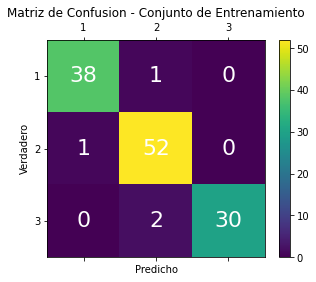

In [ ]:
# Matriz de confusion de entrenamiento
matriz_confusion_train = metrics.confusion_matrix(y_train, y_pred_train)

# Definimos los labels para la grafica de la matriz de confusion
labels = list(clasificadorRF.classes_)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
cax = ax.matshow(matriz_confusion_train)
plt.title('Matriz de Confusion - Conjunto de Entrenamiento')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
for (i, j), z in np.ndenumerate(matriz_confusion_train):
    ax.text(j, i, z, ha='center', va='center', color='white', size=22)
plt.show()

<ipython-input-22-5e09ae1e4f8e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-22-5e09ae1e4f8e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


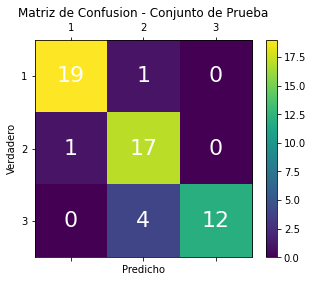

In [ ]:
# Matriz de confusion de Prueba
matriz_confusion_test = metrics.confusion_matrix(y_test, y_pred_test)

# Definimos los labels para la grafica de la matriz de confusion
labels = list(clasificadorRF.classes_)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
cax = ax.matshow(matriz_confusion_test)
plt.title('Matriz de Confusion - Conjunto de Prueba')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
for (i, j), z in np.ndenumerate(matriz_confusion_test):
    ax.text(j, i, z, ha='center', va='center', color='white', size=22)
plt.show()

In [ ]:
# Conjunto de Entrenamiento
# Calculemos la exactitud a partir de los datos de salida y los reales
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
print(f'La Exactitud de Entrenamiento es de {train_accuracy*100:0.3f} %')

# Calculemos el resto de las metricas
train_precision = metrics.precision_score(y_train, y_pred_train, average='micro')
print(f'El valor de Precision de Entrenamiento es de {train_precision}')

# El recall
train_recall = metrics.recall_score(y_train, y_pred_train, average='micro')
print(f'El valor del Recall de Entrenamiento es de {train_recall}')

# f1-score
train_f1 = metrics.f1_score(y_train, y_pred_train, average='micro')
print(f'El valor de F1-Score de Entrenamiento es de {train_f1}')

# AUC
train_auc = metrics.roc_auc_score(y_train, clasificadorRF.predict_proba(X_train_KernelPCA), average='macro', multi_class='ovr')
print(f'El valor del AUC de Entrenamiento es de {train_auc}')

La Exactitud de Entrenamiento es de 96.774 %
El valor de Precision de Entrenamiento es de 0.967741935483871
El valor del Recall de Entrenamiento es de 0.967741935483871
El valor de F1-Score de Entrenamiento es de 0.967741935483871
El valor del AUC de Entrenamiento es de 0.9910832809653461


In [ ]:
# Conjunto de Prueba
# Calculemos la exactitud a partir de los datos de salida y los reales
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print(f'La Exactitud de Prueba es de {test_accuracy*100:0.3f} %')

# Calculemos el resto de las metricas
test_precision = metrics.precision_score(y_test, y_pred_test, average='micro')
print(f'El valor de Precision de Prueba es de {test_precision}')

# El recall
test_recall = metrics.recall_score(y_test, y_pred_test, average='micro')
print(f'El valor del Recall de Prueba es de {test_recall}')

# f1-score
test_f1 = metrics.f1_score(y_test, y_pred_test, average='micro')
print(f'El valor de F1-Score de Prueba es de {test_f1}')

# AUC
test_auc = metrics.roc_auc_score(y_test, clasificadorRF.predict_proba(X_test_KernelPCA), average='macro', multi_class='ovr')
print(f'El valor del AUC de Prueba es de {test_auc}')

La Exactitud de Prueba es de 88.889 %
El valor de Precision de Prueba es de 0.8888888888888888
El valor del Recall de Prueba es de 0.8888888888888888
El valor de F1-Score de Prueba es de 0.8888888888888888
El valor del AUC de Prueba es de 0.985260832728153


En este caso vemos como el desempeño de la clasificación también es muy bueno, e incluso las matrices de confusión tienen menor cantidad de valores fuera de la diagonal. También tenemos un desempeño superior del conjunto de prueba sobre el conjunto de entrenamiento, lo que indicaría sobreentrenamiento. Sin embargo, se observa que con un kernel no lineal y menos variables (2 componentes principales) se obtienen resultados de clasificación tan buenos como al usar todas las variables originales.

En este sentido, se observa el cómo, en efecto, el Análisis de Componentes Principales resulta un método de reducción de la dimensionalidad que puede ofrecer resultados generales para modelos de machine learning que pueden ayudar a reducir la velocidad, requerimiento de cómputo y complejidad de los mismos, ya que no es necesario trabajar con todas las variables, sino con aquellas que, en el espacio de transformación del PCA, mayor varianza se tiene.

## Ejercicio

Haciendo uso del **Boston Housing Dataset**:

In [ ]:
# Descarguemos el dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


- Aplique la técnica de Análisis de Componentes Principales a fin de reducir la dimensionalidad del conjunto de datos, y construir luego un modelo de Regresión para predecir el valor medio de las edificaciones (variable medv).
- Estudie el cómo afecta el resultado de regresión la selección de la cantidad de componentes principales calculadas. Es decir, construya un PCA con 2,3,4,5 componentes, por ejemplo, y cuantifique la variación del RMSE para cada modelo de regresión final obtenido. ¿Qué puede decir sobre el efecto de la cantidad de Componentes Principales sobre el desempeño del modelo de regresión seleccionado?